# Data Science Group Group Project Proposal 006-021
#### Members: 
- Jaden Lai (79465795)
- Percy Pham (70210562)
- Sydney Trim (86059649)

## Title: Heart Disease Data:
### Introduction:
Heart disease is a leading cause of death worldwide that is influenced by many variables including age, sex, blood pressure, diet, and many more. This project aims to identify patients most likely to experience heart problems (chest pain, heart disease) and the associations between them by analyzing age, sex, resting blood pressure, resting electrocardiographic results, and fasting blood sugar. To answer this question we will be analyzing and manipulating the Heat Disease Data Set from the Hungarian Institute of Cardiology. This dataset includes fourteen attributes. However, we have selected eight of them to use in our analysis as we seek an answer to our question.

Question: Patient’s most likely to experience heart problems (chest pain, exercise induced angina, thalassemia, heart disease) using predictors, age, sex, resting blood pressure, resting electrocardiographic results, fasting blood sugar


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

##### Downloading the data, cleaning the table

In [117]:
# Downloading the data, cleaning the table
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", "data/project_.csv")
heart_disease_hungarian <- read_csv("data/project_.csv", col_names = FALSE)
colnames(heart_disease_hungarian) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "tha;ach", "exang", "oldpeak", "slope", "ca", "thal", "num") 
heart_disease_hungarian <- heart_disease_hungarian |>
            select(age, sex, cp, trestbps, fbs, restecg, num) |> 
            mutate(sex = recode(sex, "1" = "Male", "0" = "Female")) |>
            mutate(trestbps = as.numeric(trestbps),
                   fbs = as.numeric(trestbps),
                  restecg = as.numeric(trestbps)) |>
           group_by(age,sex) |>
           summarize(cp = sum(cp, na.rm = TRUE),
                trestbps = sum(trestbps, na.rm = TRUE),
                fbs = sum(fbs, na.rm = TRUE),
                restecg = sum(restecg, na.rm = TRUE),
                num = sum(num, na.rm = TRUE)) 

head(heart_disease_hungarian, 5)
heart_disease_hungarian

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


age,sex,cp,trestbps,fbs,restecg,num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,Male,2,130,130,130,0
29,Male,4,260,260,260,0
30,Female,1,170,170,170,0
31,Female,2,100,100,100,0
31,Male,4,120,120,120,1


age,sex,cp,trestbps,fbs,restecg,num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,Male,2,130,130,130,0
29,Male,4,260,260,260,0
30,Female,1,170,170,170,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,Male,4,150,150,150,1
65,Male,12,440,440,440,3
66,Male,4,140,140,140,1


##### Training and testing

In [118]:
hd_split <- initial_split(heart_disease_hungarian, prop = 0.75, strata = num)  
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

hd_train
hd_test

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


age,sex,cp,trestbps,fbs,restecg,num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,Male,2,130,130,130,0
30,Female,1,170,170,170,0
31,Male,4,120,120,120,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,Male,23,1091,1091,1091,4
59,Male,20,860,860,860,2
65,Male,12,440,440,440,3


age,sex,cp,trestbps,fbs,restecg,num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,Male,4,260,260,260,0
31,Female,2,100,100,100,0
32,Female,2,105,105,105,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,Male,8,430,430,430,2
61,Male,4,125,125,125,0
66,Male,4,140,140,140,1


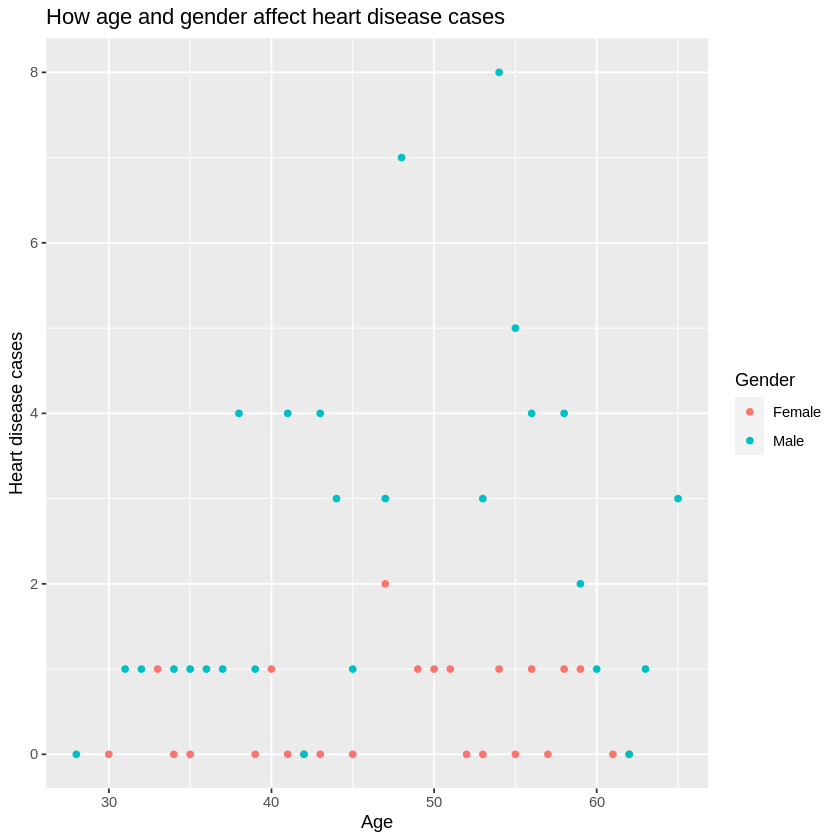

In [122]:
# your code here
heart_disease_plot <- hd_train |>
    ggplot(aes(x = age, y = num, color = sex)) + 
        geom_point() +
        labs(x = "Age", y = "Heart disease cases", color = "Gender", title = "How age and gender affect heart disease cases")

heart_disease_plot

# Expected Outcomes and Significance:

## What do we expect to find: 
We expect to find a correlation between heart problems like chest pain and heart disease linked to other variables such as age, sex, resting blood pressure, resting ekg, and fasting blood pressure. From our findings we will be able to see the main variable that leads to heart diseases. We can also expect to see certain variables be more of an issue than expected, for example age and resting blood pressure if to be an expected variable, but sex is surprising as one gender is more at risk compared to the other. 

## What impact do such findings have:
The data we observe from this project will have an impact on how we will be able to find people or populations most at risk for heart disease, and they can get tested earlier for early warning signs.

## What future questions could this lead to: 
Future questions that this could lead to is; if a certain variable is heavily correlated to heart disease how can we prevent it within the population, especially if the community doesn't necessarily have the resources for prevention. Also, what other variables other than the ones we found could lead to being predisposed for heart diseases. How much control do patients have over their risk for heart disease and how can they prevent these variables.

# References
- Ashley, E. A., Raxwal, V., & Froelicher, V. (2001). An evidence-based review of the resting electrocardiogram as a screening technique for heart disease. Progress in Cardiovascular Diseases, 44(1), 55–67. https://doi.org/10.1053/pcad.2001.24683
- He, K., Chen, X., Shi, Z., Shi, S., Tian, Q., Hu, X., Song, R., Bai, K., Shi, W., Wang, J., Li, H., Ding, J., Geng, S., & Sheng, X. (2022). Relationship of resting heart rate and blood pressure with all-cause and cardiovascular disease mortality. Public Health, 208, 80–88. https://doi.org/10.1016/j.puhe.2022.03.020 
- Maas, A. H. E. M., & Appelman, Y. E. A. (2010). Gender differences in coronary heart disease. Netherlands Heart Journal, 18(12), 598–603. https://doi.org/10.1007/s12471-010-0841-y
- Moran, A. E., Tzong, K. Y., Forouzanfar, M. H., Roth, G. A., Mensah, G. A., Ezzati, M., Murray, C. J. L., & Naghavi, M. (2014). Variations in ischemic heart disease burden by age, country, and income: the global burden of diseases, injuries, and risk factors 2010 study. Global Heart, 9(1), 91. https://doi.org/10.1016/j.gheart.2013.12.007 
- Park, C., Guallar, E., Linton, J. A., Lee, D.-C., Jang, Y., Son, D. K., Han, E.-J., Baek, S. J., Yun, Y. D., Jee, S. H., & Samet, J. M. (2013). Fasting glucose level and the risk of incident atherosclerotic cardiovascular diseases. Diabetes Care, 36(7), 1988–1993. https://doi.org/10.2337/dc12-1577 